# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities[0:5]

['sao filipe', 'rikitea', 'berlevag', 'new norfolk', 'whittlesea']

In [3]:
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
###Step3:Perform a weather check on each of the cities using a series of 
#successive API calls.

base_url = "https://api.openweathermap.org/data/2.5/weather?appid="
city_data = []
call_count = 1
for city in cities:
    target_url = base_url + weather_api_key + "&q=" + city + "&units=metric"
    # Log the url, record, and city
    if call_count == 1: 
        print("Making API call")
    print(f"{call_count} Getting data for {city}")
    print(target_url)
    response = requests.get(target_url)
    try:
        results = response.json()
        city_data.append(results)
        call_count = call_count + 1
    except KeyError:
        next        
print(f"API calls finished, {call_count} successful calls made")

Making API call
1 Getting data for sao filipe
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=sao filipe&units=metric
2 Getting data for rikitea
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=rikitea&units=metric
3 Getting data for berlevag
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=berlevag&units=metric
4 Getting data for new norfolk
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=new norfolk&units=metric
5 Getting data for whittlesea
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=whittlesea&units=metric
6 Getting data for saint george
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=saint george&units=metric
7 Getting data for alice springs
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=alice sp

59 Getting data for port hardy
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=port hardy&units=metric
60 Getting data for faanui
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=faanui&units=metric
61 Getting data for doctor pedro p. pena
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=doctor pedro p. pena&units=metric
62 Getting data for taolanaro
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=taolanaro&units=metric
63 Getting data for hilo
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=hilo&units=metric
64 Getting data for iqaluit
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=iqaluit&units=metric
65 Getting data for yellowknife
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=yellowknife&units=metri

117 Getting data for pevek
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=pevek&units=metric
118 Getting data for camapua
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=camapua&units=metric
119 Getting data for oranjemund
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=oranjemund&units=metric
120 Getting data for kampot
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=kampot&units=metric
121 Getting data for shaunavon
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=shaunavon&units=metric
122 Getting data for kahta
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=kahta&units=metric
123 Getting data for lompoc
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=lompoc&units=metric
124 Getting data for dmytrivk

175 Getting data for belushya guba
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=belushya guba&units=metric
176 Getting data for okhotsk
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=okhotsk&units=metric
177 Getting data for padang
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=padang&units=metric
178 Getting data for tyrma
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=tyrma&units=metric
179 Getting data for andenes
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=andenes&units=metric
180 Getting data for lata
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=lata&units=metric
181 Getting data for bilma
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=bilma&units=metric
182 Getting data for husavik
ht

234 Getting data for saint anthony
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=saint anthony&units=metric
235 Getting data for marsh harbour
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=marsh harbour&units=metric
236 Getting data for charleston
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=charleston&units=metric
237 Getting data for westport
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=westport&units=metric
238 Getting data for isangel
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=isangel&units=metric
239 Getting data for ostrovnoy
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=ostrovnoy&units=metric
240 Getting data for barmer
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=barmer&units=

292 Getting data for jesup
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=jesup&units=metric
293 Getting data for inuvik
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=inuvik&units=metric
294 Getting data for lakatoro
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=lakatoro&units=metric
295 Getting data for ligayan
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=ligayan&units=metric
296 Getting data for burgersdorp
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=burgersdorp&units=metric
297 Getting data for rawson
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=rawson&units=metric
298 Getting data for ulkan
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=ulkan&units=metric
299 Getting data for artyk
ht

350 Getting data for opuwo
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=opuwo&units=metric
351 Getting data for solnechnyy
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=solnechnyy&units=metric
352 Getting data for bukachacha
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=bukachacha&units=metric
353 Getting data for moose factory
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=moose factory&units=metric
354 Getting data for ahipara
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=ahipara&units=metric
355 Getting data for grand river south east
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=grand river south east&units=metric
356 Getting data for beringovskiy
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b784

408 Getting data for kieta
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=kieta&units=metric
409 Getting data for pimenta bueno
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=pimenta bueno&units=metric
410 Getting data for shakawe
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=shakawe&units=metric
411 Getting data for awbari
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=awbari&units=metric
412 Getting data for honiara
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=honiara&units=metric
413 Getting data for tommot
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=tommot&units=metric
414 Getting data for anadyr
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=anadyr&units=metric
415 Getting data for cheg

467 Getting data for banepa
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=banepa&units=metric
468 Getting data for nemuro
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=nemuro&units=metric
469 Getting data for swellendam
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=swellendam&units=metric
470 Getting data for dzilam gonzalez
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=dzilam gonzalez&units=metric
471 Getting data for aflu
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=aflu&units=metric
472 Getting data for vizinga
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=vizinga&units=metric
473 Getting data for esil
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=esil&units=metric
474 Getting data for 

526 Getting data for lardos
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=lardos&units=metric
527 Getting data for bikaner
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=bikaner&units=metric
528 Getting data for sungairaya
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=sungairaya&units=metric
529 Getting data for rincon
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=rincon&units=metric
530 Getting data for banda aceh
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=banda aceh&units=metric
531 Getting data for donegal
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=donegal&units=metric
532 Getting data for karaul
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=karaul&units=metric
533 Getting data for 

585 Getting data for anton lizardo
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=anton lizardo&units=metric
586 Getting data for upata
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=upata&units=metric
587 Getting data for ngunguru
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=ngunguru&units=metric
588 Getting data for north bend
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=north bend&units=metric
589 Getting data for waingapu
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=waingapu&units=metric
590 Getting data for brae
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=brae&units=metric
591 Getting data for paltin
https://api.openweathermap.org/data/2.5/weather?appid=0845fadc8ba8cc650f9af2c9b78478de&q=paltin&units=metric
592 Getting data 

In [6]:
city_data[0]

{'coord': {'lon': -24.5, 'lat': 14.9},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 27.74,
  'feels_like': 29.48,
  'temp_min': 27.74,
  'temp_max': 27.74,
  'pressure': 1015,
  'humidity': 70,
  'sea_level': 1015,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 4.04, 'deg': 71},
 'clouds': {'all': 2},
 'dt': 1603459459,
 'sys': {'country': 'CV', 'sunrise': 1603438267, 'sunset': 1603480388},
 'timezone': -3600,
 'id': 3374210,
 'name': 'São Filipe',
 'cod': 200}

In [7]:
#data = json.load(read_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
lat = []
lon = []
temp = []
hum = []
winds = []
cloud = []
city = []
country = []

for item in city_data:
    try:
        lat.append(item["coord"]["lat"])
        lon.append(item["coord"]["lon"])
        temp.append(item["main"]["temp"])
        hum.append(item["main"]["humidity"])
        winds.append(item["wind"]["speed"])
        cloud.append(item["clouds"]["all"])
        city.append(item["name"])
        country.append(item["sys"]["country"])
    except:
        next 

In [9]:
city_df = pd.DataFrame({"City": city,
                        "Country":country,                                  
                        "Longitude (Degrees)":lon,
                        "Latitude (Degrees)":lat,
                        "Maximum Temperature (C)":temp,
                        "Humidity (%)":hum,
                        "Wind Speed (km/h)":winds,
                        "Cloudiness (%)":cloud}) 

In [10]:
city_df.head()

,City,Country,Longitude (Degrees),Latitude (Degrees),Maximum Temperature (C),Humidity (%),Wind Speed (km/h),Cloudiness (%)
0,São Filipe,CV,-24.50,14.90,27.74,70,4.04,2
1,Rikitea,PF,-134.97,-23.12,23.34,79,1.48,41
2,Berlevåg,NO,29.09,70.86,2.28,86,17.50,75
3,New Norfolk,AU,147.06,-42.78,11.39,79,0.46,100
4,Whittlesea,ZA,26.82,-32.18,28.40,26,15.24,99


In [11]:
city_df.to_csv('city_data.csv') 

In [12]:
city_path='city_data.csv'

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
weather_data=pd.read_csv(city_path)

In [14]:
weather_data.drop(weather_data[weather_data["Humidity (%)"]>100].index, inplace=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

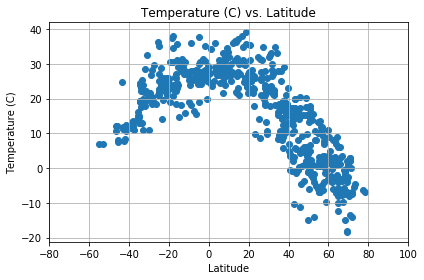

In [15]:
#Temperature (F) vs. Latitude
x=weather_data["Latitude (Degrees)"]
y= weather_data["Maximum Temperature (C)"]
plt.xlim(-80,100)
plt.scatter(weather_data["Latitude (Degrees)"], weather_data["Maximum Temperature (C)"] )
plt.title("Temperature (C) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.tight_layout()

plt.grid()
plt.savefig('latitude_vs_temp.png')

In [16]:
#Seems to be a parabolic relationship between latitude and temperature, with temperatures highest around the equator

## Latitude vs. Humidity Plot

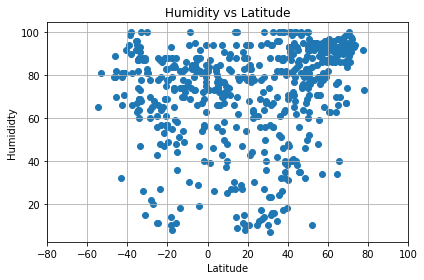

In [17]:
#Humidity vs latitude
x=weather_data["Latitude (Degrees)"]
y= weather_data["Humidity (%)"]
plt.xlim(-80,100)
plt.scatter(weather_data["Latitude (Degrees)"], weather_data["Humidity (%)"] )
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humididty")
plt.tight_layout()

plt.grid()
plt.savefig('latitude_vs_humidity.png')

In [18]:
#There does not seem to be a particularly strong relationship between latitude and humidity, based on this graph

## Latitude vs. Cloudiness Plot

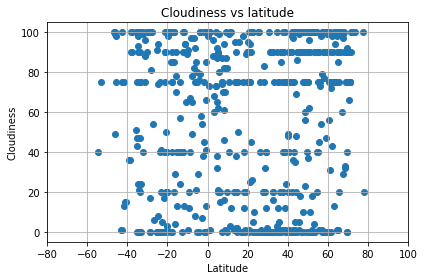

In [19]:
#Cloudiness vs latitude
x=weather_data["Latitude (Degrees)"]
y= weather_data["Cloudiness (%)"]
plt.xlim(-80,100)
plt.scatter(weather_data["Latitude (Degrees)"], weather_data["Cloudiness (%)"] )
plt.title("Cloudiness vs latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()

plt.grid()
plt.savefig('latitude_vs_cloudiness.png')

In [20]:
#There does not seem to be any particular relationship between latitude and cloudiness

## Latitude vs. Wind Speed Plot

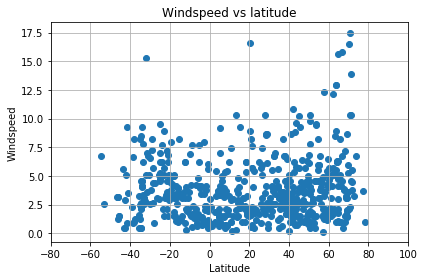

In [21]:
#Wind speed vs latitude
x=weather_data["Latitude (Degrees)"]
y= weather_data["Wind Speed (km/h)"]
plt.xlim(-80,100)
plt.scatter(weather_data["Latitude (Degrees)"], weather_data["Wind Speed (km/h)"] )
plt.title("Windspeed vs latitude")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.tight_layout()

plt.grid()
plt.savefig('latitude_vs_wind.png')

In [22]:
#There does not seem to be any particularly strong relationship between windspeed and latitude, 
#except perhaps a slight increase in max wind speeds at either extreme end of latitudes (-40 degrees south, 70-80 degrees north)

## Linear Regression

In [27]:
# Create Northern and Southern Hemisphere DataFrames

In [28]:
weather_data.head()

,Unnamed: 0,City,Country,Longitude (Degrees),Latitude (Degrees),Maximum Temperature (C),Humidity (%),Wind Speed (km/h),Cloudiness (%)
0,0,São Filipe,CV,-24.50,14.90,27.74,70,4.04,2
1,1,Rikitea,PF,-134.97,-23.12,23.34,79,1.48,41
2,2,Berlevåg,NO,29.09,70.86,2.28,86,17.50,75
3,3,New Norfolk,AU,147.06,-42.78,11.39,79,0.46,100
4,4,Whittlesea,ZA,26.82,-32.18,28.40,26,15.24,99


In [29]:
type(weather_data)

pandas.core.frame.DataFrame

In [30]:
northern_data= weather_data[weather_data["Latitude (Degrees)"] >0]

In [31]:
type(northern_data)

pandas.core.frame.DataFrame

In [32]:
northern_data.shape

(387, 9)

In [33]:
southern_data= weather_data[weather_data["Latitude (Degrees)"] <=0]

In [34]:
southern_data.shape

(181, 9)

In [35]:
nor_range=range(0,90)

In [36]:
type(nor_range)

range

In [37]:
len(nor_range)

90

In [38]:
nor_dummy=pd.Series(nor_range)

In [39]:
south_range=range(-90,0)

In [40]:
south_dummy=pd.Series(south_range)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
north_lat=northern_data["Latitude (Degrees)"]
north_temp=northern_data["Maximum Temperature (C)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_lat, north_temp)
print(f"The R-Squared value is: {rvalue}")

The R-Squared value is: -0.8618316787386961


In [42]:
nor_temp_pred=nor_dummy*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))

The R-Squared value is: -0.8618316787386961


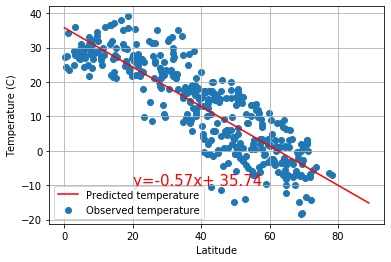

<Figure size 432x288 with 0 Axes>

In [43]:
print(f"The R-Squared value is: {rvalue}")
plt.scatter(north_lat, north_temp, label="Observed temperature")
plt.plot(nor_dummy,nor_temp_pred, color="r", label="Predicted temperature")
plt.legend(loc="lower left")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.annotate(line_eq, (20, -10), fontsize=15, color="red")
plt.show()
plt.savefig('north_temp.png')

In [ ]:
#plot shows scatter and fitted line, showing that as we go further north, temperatures decline. 
#R-squared is fairly high suggesting godd explanability

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [44]:
south_lat=southern_data["Latitude (Degrees)"]
south_temp=southern_data["Maximum Temperature (C)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_lat, south_temp)

In [45]:
south_temp_pred=south_dummy*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))

The R-Squared value is: 0.6741844295835487


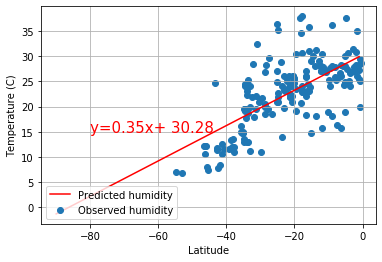

<Figure size 432x288 with 0 Axes>

In [46]:
print(f"The R-Squared value is: {rvalue}")
plt.scatter(south_lat, south_temp, label="Observed humidity")
plt.plot(south_dummy,south_temp_pred, color="r", label="Predicted humidity")
plt.legend(loc="lower left")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.annotate(line_eq, (-80, 15), fontsize=15, color="red")
plt.show()
plt.savefig('south_temp.png')

In [47]:
#plot shows scatter and fitted line, showing that as we go further from the equator, temperatures fall.
#R-squared still reasonably high, so decent explanatory power

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [48]:
north_lat=northern_data["Latitude (Degrees)"]
north_hum=northern_data["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_lat, north_hum)
print(f"The R-Squared value is: {rvalue}")

The R-Squared value is: 0.3508582035211806


In [49]:
nor_hum_pred=nor_dummy*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))

The R-Squared value is: 0.3508582035211806


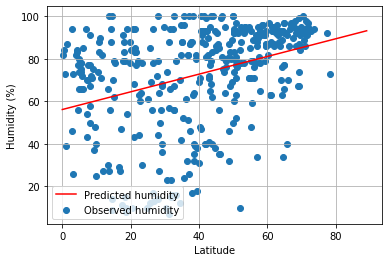

<Figure size 432x288 with 0 Axes>

In [50]:
print(f"The R-Squared value is: {rvalue}")
plt.scatter(north_lat, north_hum, label="Observed humidity")
plt.plot(nor_dummy,nor_hum_pred, color="r", label="Predicted humidity")
plt.legend(loc="lower left")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (20, -10), fontsize=15, color="red")
plt.show()
plt.savefig('north_humidity.png')

In [51]:
#Scatter plot showing a slightly positive correlation (low R-squared) between latitude and humididty, which is surprising. 
#Would have assumed tropics were more humid.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [52]:
south_lat=southern_data["Latitude (Degrees)"]
south_hum=southern_data["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_lat, south_hum)

In [53]:
south_hum_pred=south_dummy*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))

The R-Squared value is: -0.09633463061934228


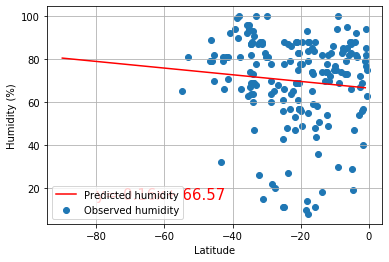

<Figure size 432x288 with 0 Axes>

In [54]:
print(f"The R-Squared value is: {rvalue}")
plt.scatter(south_lat, south_hum, label="Observed humidity")
plt.plot(south_dummy,south_hum_pred, color="r", label="Predicted humidity")
plt.legend(loc="lower left")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-80, 15), fontsize=15, color="red")
plt.show()
plt.savefig('south_humidity.png')

In [56]:
#Scatter plot showing a slightly negative correlation between latitude and humididty.
#As in the case wit the northern hemisphere results, would have assumed tropics were more humid.
#However, very low R-squared means won't take too much from this apparent correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared value is: 0.17249210979124682
The R-Squared value is: 0.17249210979124682


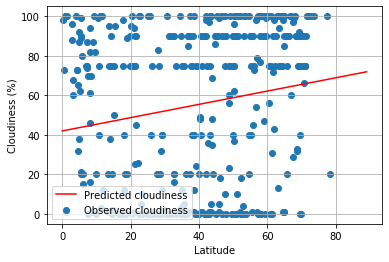

<Figure size 432x288 with 0 Axes>

In [57]:
north_lat=northern_data["Latitude (Degrees)"]
north_cloud=northern_data["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_lat, north_cloud)
print(f"The R-Squared value is: {rvalue}")

nor_cloud_pred=nor_dummy*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))

print(f"The R-Squared value is: {rvalue}")
plt.scatter(north_lat, north_cloud, label="Observed cloudiness")
plt.plot(nor_dummy,nor_cloud_pred, color="r", label="Predicted cloudiness")
plt.legend(loc="lower left")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (20, -10), fontsize=15, color="red")
plt.show()
plt.savefig('north_cloud.png')

In [58]:
#A scatter plot showing relationship between cloudiness and latitude. Low R-squared suggests weak explanatory power.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared value is: -0.020282877096005864


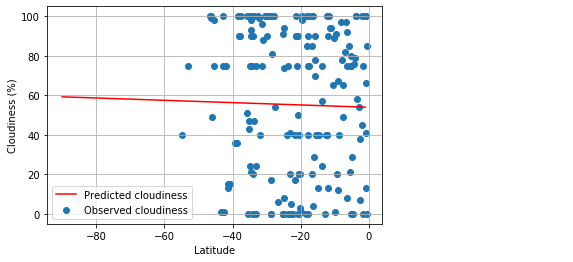

<Figure size 432x288 with 0 Axes>

In [59]:
south_lat=southern_data["Latitude (Degrees)"]
south_cloud=southern_data["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_lat, south_cloud)
print(f"The R-Squared value is: {rvalue}")

south_cloud_pred=south_dummy*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))

plt.scatter(south_lat, south_cloud, label="Observed cloudiness")
plt.plot(south_dummy,south_cloud_pred, color="r", label="Predicted cloudiness")
plt.legend(loc="lower left")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (20, -10), fontsize=15, color="red")
plt.show()
plt.savefig('south_cloud.png')

In [60]:
#A scatter plot showing weak negative relationship between cloudiness and latitude for southern hemisphere cities.
#Low R-squared suggests weak explanatory power.

####  Northern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The R-Squared value is: 0.205407272145859


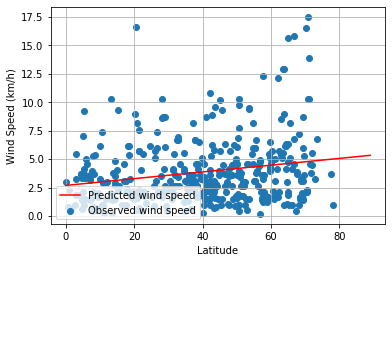

<Figure size 432x288 with 0 Axes>

In [61]:
north_lat=northern_data["Latitude (Degrees)"]
north_wind=northern_data["Wind Speed (km/h)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(north_lat, north_wind)
print(f"The R-Squared value is: {rvalue}")

nor_wind_pred=nor_dummy*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))

plt.scatter(north_lat, north_wind, label="Observed wind speed")
plt.plot(nor_dummy,nor_wind_pred, color="r", label="Predicted wind speed")
plt.legend(loc="lower left")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.annotate(line_eq, (20, -10), fontsize=15, color="red")
plt.show()
plt.savefig('north_wind.png')

In [62]:
##A scatter plot showing a slight positive relationship between windspeed and latitude,
#i.e the further nort a city, the winder it is. 
#Low R-squared suggests weak explanatory power.

####  Southern Hemisphere - Wind Speed (kph) vs. Latitude Linear Regression

The R-Squared value is: -0.15087514643331898


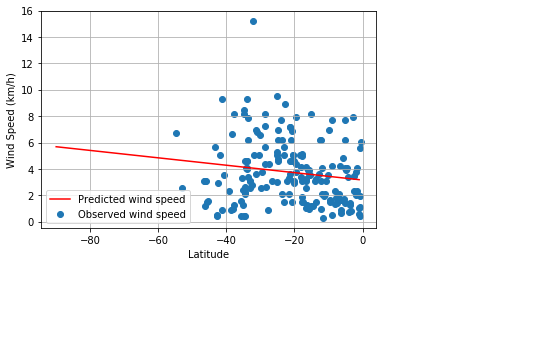

<Figure size 432x288 with 0 Axes>

In [63]:
south_lat=southern_data["Latitude (Degrees)"]
south_wind=southern_data["Wind Speed (km/h)"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(south_lat, south_wind)
print(f"The R-Squared value is: {rvalue}")

south_wind_pred=south_dummy*slope+intercept
line_eq="y="+str(round(slope, 2))+"x+ "+str(round(intercept,2))

plt.scatter(south_lat, south_wind, label="Observed wind speed")
plt.plot(south_dummy,south_wind_pred, color="r", label="Predicted wind speed")
plt.legend(loc="lower left")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.annotate(line_eq, (20, -10), fontsize=15, color="red")
plt.show()
plt.savefig('south_wind.png')

In [64]:
##A scatter plot showing a slight negative relationship between windspeed and latitude,
#i.e the further south a city, the winder it is. 
#Low R-squared suggests weak explanatory power.